In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import time
from datetime import date

In [25]:
data = pd.read_csv('BTC_data.csv')
data_x = np.array(data['time'])
data_y = np.array(data['close'])
d1 = date.fromisoformat((data_x[0][:-15]))
d2 = date.fromisoformat(data_x[len(data_x)-1][:-15])
delta_d = abs(d2-d1).days
# print(delta_d)

2111


In [93]:
data_y_poly = np.polyfit([ abs(date.fromisoformat(i[:-15]) - d1).days for i in data_x], data_y, 49)
print(len(data_y_poly))
data_x_poly = [ abs(date.fromisoformat(data_x[i][:-15]) - d1).days for i in range(0, len(data_x) - 20, len(data_x)//50)]
print(len(data_x_poly), data_x_poly)
p = np.poly1d(data_y_poly)
# print(p)

50
50 [0, 44, 86, 128, 170, 212, 253, 295, 336, 380, 422, 464, 506, 548, 590, 632, 673, 715, 758, 801, 842, 884, 926, 968, 1010, 1051, 1093, 1137, 1179, 1221, 1263, 1305, 1346, 1388, 1429, 1472, 1514, 1556, 1598, 1640, 1683, 1725, 1766, 1808, 1851, 1894, 1935, 1976, 2019, 2061]


c:\Users\12345\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\12345\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\12345\AppData\Local\Temp\ipykernel_6748\2346756740.py:1: RankWarning: Polyfit may be poorly conditioned
  data_y_poly = np.polyfit([ abs(date.fromisoformat(i[:-15]) - d1).days for i in data_x], data_y, 49)


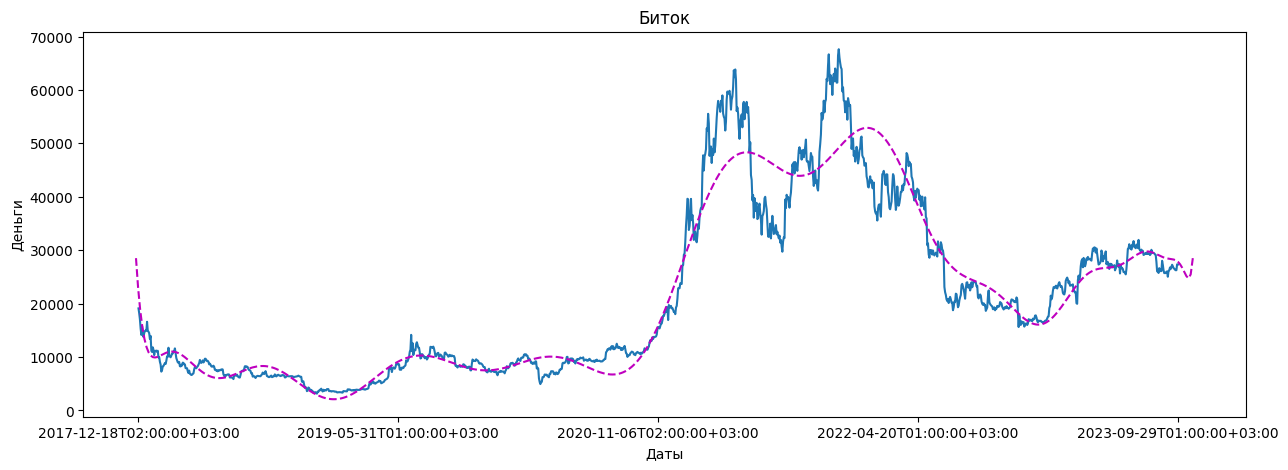

In [99]:
ax = plt.figure(figsize=(15,5))
ax = plt.plot(data_x, data_y)
ax = plt.title('Биток')
ax = plt.xlabel('Даты')
ax = plt.ylabel('Деньги')
ax = plt.xticks([data_x[i] for i in range(0, len(data_x), int(len(data_x)/4))])
xp = np.linspace(-5, 2110, 500)
ax2 = plt.plot(xp * 0.7, p(xp), 'm--')
